<a href="https://colab.research.google.com/github/akitim/SkillFactory_projects/blob/main/Akimkin_Timofey_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_4_%D0%90%D0%B2%D0%B8%D0%B0%D1%80%D0%B5%D0%B9%D1%81%D1%8B_%D0%B1%D0%B5%D0%B7_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка библиотек

In [36]:
import pandas as pd
from datetime import datetime as dat
#import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings; warnings.filterwarnings('ignore') #(action='once')
# import missingno as msno
# from itertools import combinations
# from scipy.stats import ttest_ind
# from scipy.stats import norm
 
%matplotlib inline
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format

#Загрузка датасета

In [37]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/Project_4%20-%20Loseless%20flights_v3.csv'
data = pd.read_csv(path)
        
data.sample(15)

,flight_id,departure_city,arrival_city,scheduled_departure,flight_duration_in_hr,flight_distance,avg_speed,aircraft_model,seats_in_a_plane,seats_sold,economy_seats_in_a_plane,economy_sold,business_seats_in_a_plane,business_sold,gain_per_flight,income_per_flight_dist,income_per_flight_dur
78,136645,Анапа,Белгород,2017-01-05T09:25:00Z,0.85,636,748.24,Sukhoi Superjet-100,97,82,85,73.00,12,9.00,633000.00,591943.00,566082.00
42,136389,Анапа,Москва,2017-01-18T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,129,118,117.00,12,12.00,1873800.00,1705921.00,1708060.00
47,136428,Анапа,Москва,2017-01-21T10:05:00Z,1.65,1208,732.12,Boeing 737-300,130,115,118,104.00,12,11.00,1678600.00,1528940.00,1514517.00
16,136204,Анапа,Москва,2017-02-23T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,107,118,101.00,12,6.00,1457800.00,1324876.00,1299588.00
49,136439,Анапа,Москва,2017-02-25T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,117,118,106.00,12,11.00,1701800.00,1556453.00,1543588.00
75,136630,Анапа,Белгород,2017-02-25T09:25:00Z,0.83,636,763.20,Sukhoi Superjet-100,97,94,85,82.00,12,12.00,746400.00,701472.00,683774.00
120,136922,Анапа,Белгород,2017-02-11T09:25:00Z,0.83,636,763.20,Sukhoi Superjet-100,97,76,85,66.00,12,10.00,607800.00,571475.00,545174.00
31,136310,Анапа,Москва,2017-01-22T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,117,118,108.00,12,9.00,1654200.00,1501937.00,1488460.00
43,136403,Анапа,Москва,2017-02-20T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,129,118,117.00,12,12.00,1873800.00,1713546.00,1715588.00
72,136609,Анапа,Белгород,2017-01-08T09:25:00Z,0.83,636,763.20,Sukhoi Superjet-100,97,81,85,71.00,12,10.00,639300.00,598743.00,573695.00


## **Пояснение к датасету**

*   flight_id - индентификатор рейса 
*   departure_city - город отправления
*   arrival_city - город прибытия
*   scheduled_departure - дата и время отправления по расписанию
*   flight_duration_in_hr - фактическая продолжительность полета, ч
*   flight_distance - дальность рейса, км
*   avg_speed - средняя скорость на рейсе, км/ч
*   aircraft_model - модель самолета
*   seats_in_a_plane - количество пассажирских мест в самолете
*   seats_sold - общее количество проданных мест
*   economy_sold - количество проданных мест в эконом-классе
*   business_sold - количество проданных мест в бизнес-классе
*   gain_per_flight - выручка от продажи билетов на рейс
*   income_per_flight_dist - оценка прибыльности рейса по дальности полета
*   income_per_flight_dur - оценка прибыльности рейса по длительности полета




In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   flight_id                  127 non-null    int64  
 1   departure_city             127 non-null    object 
 2   arrival_city               127 non-null    object 
 3   scheduled_departure        127 non-null    object 
 4   flight_duration_in_hr      127 non-null    float64
 5   flight_distance            127 non-null    int64  
 6   avg_speed                  127 non-null    float64
 7   aircraft_model             127 non-null    object 
 8   seats_in_a_plane           127 non-null    int64  
 9   seats_sold                 127 non-null    int64  
 10  economy_seats_in_a_plane   127 non-null    int64  
 11  economy_sold               118 non-null    float64
 12  business_seats_in_a_plane  127 non-null    int64  
 13  business_sold              118 non-null    float64

In [39]:
# data[['avg_speed', 'gain_per_flight', 'income_per_flight_eval1', 'income_per_flight_eval2']] =\
#     data[['avg_speed', 'gain_per_flight', 'income_per_flight_eval1', 'income_per_flight_eval2']].\
#         apply(lambda se: se.apply(lambda x: '%.0f' % x), axis=1)

data.drop(['avg_speed', 'income_per_flight_dist'], axis=1, inplace=True)

###Рейсы в Новокузнецк не имеют статус отменненых, однако **данных** по количеству купленных билетов и соответственно по прибыли нет

In [40]:
print('Количество непустых строк по городу прибытия Новокузнецк: ', data[(data.seats_sold != 0) & (data.arrival_city == 'Новокузнецк')].shape[0])

data.fillna(0, inplace=True) # заполняем отсутствующие данные нулями

Количество непустых строк по городу прибытия Новокузнецк:  0


##Распределение заполняемости самолета по рейсам и модели самолета

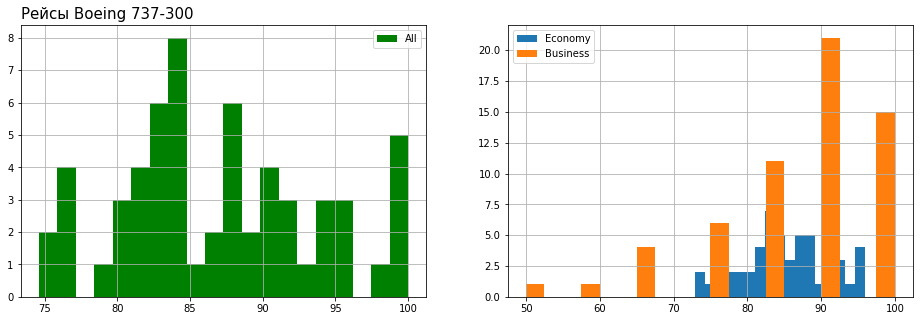

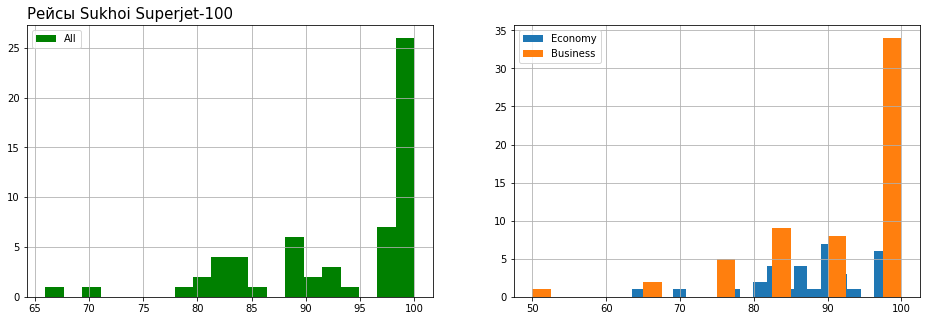

In [68]:
# вводим столбцы для заполняемости самолета
data['occupancy_rate'] = data.seats_sold / data.seats_in_a_plane * 100
data['eco_occupancy_rate'] = data.economy_sold / data.economy_seats_in_a_plane * 100
data['biz_occupancy_rate'] = data.business_sold / data.business_seats_in_a_plane * 100

for model in data.aircraft_model.unique():
    plt.rcParams["figure.figsize"] = (16, 5)
    fig, axs = plt.subplots(1, 2)
    plt.axes(axs[0])
    plt.title(f'Рейсы {model}', fontdict = {'fontsize': 15}, loc='left')
    data[(data.aircraft_model == model) & (data.seats_sold != 0)].occupancy_rate.hist(bins=20, color='green');
    plt.legend(['All'])
    
    plt.axes(axs[1])
    for col in ['eco_occupancy_rate', 'biz_occupancy_rate']:
        data[(data.aircraft_model == model) & (data.seats_sold != 0)][col].hist(bins=20);
    plt.legend(['Economy', 'Business'])
    plt.show()

##Рейсы с низкой заполняемостью - возможные кандидаты на отмену

In [ ]:
data[(data.occupancy_rate > 0) & (data.occupancy_rate < 75)][['flight_id', 'scheduled_departure', 'arrival_city']]

In [ ]:
df1 = pd.DataFrame(data.groupby(by=['arrival_city', 'aircraft_model'])['departure_city'].count())
df1.columns = ['num_of_flights']

df2 = data.drop(['flight_id'], axis=1).groupby(by=['arrival_city', 'aircraft_model']).mean()
df2.rename(columns={'income_per_flight_dur': 'income_per_flight'}, inplace=True)
df2['income_per_flight_hr'] = df2.income_per_flight / df2.flight_duration_in_hr
pd.concat([df1, df2], axis=1)